# Create CO2 - ice-edge latitude diagrams and calculate stability
Stability is assessed by reading simulation data and applying the stability criterion. CO2 - ice-edge latitude diagrams are created by manual input of stability and equilibrium ice-edge latitude. The actual bifurcation diagram is added afterwards as a best guess.

In [11]:
%matplotlib inline
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


def plot_simulation_merged(axes,co2, startlat, endlat, col, stable, offset=0): #plot a simulation into the bifurcation diagram
    #plt.plot(co2,np.sin(np.radians(startlat)),'bo',fillstyle='none')#
    handle = []
    if stable==2: # metastable
        axes.plot(co2 *(1+offset),np.sin(np.radians(endlat)),markeredgecolor=col,marker='o',markerfacecolor="none",clip_on=False)
    elif stable==1: # stable from warm
        axes.plot(co2 *(1+offset),np.sin(np.radians(endlat)),color=col,marker='o',clip_on=False)
    elif stable==3: # towards Snowball
        if endlat==0:
            axes.plot(co2 *(1+offset),np.sin(np.radians(endlat)),color=col,marker='v',clip_on=False)
        else:
            axes.plot(co2 *(1+offset),np.sin(np.radians(endlat)),color=col,markerfacecolor='none',marker='v',clip_on=False)
        handle, =axes.plot([co2 *(1+offset),co2 *(1+offset)],[np.sin(np.radians(startlat)),np.sin(np.radians(endlat))],color=col,linestyle='-',alpha=0.5,clip_on=False) #plot the line
    elif stable==4: # towards icefree
        axes.plot(co2 *(1+offset),np.sin(np.radians(endlat)),color=col,markerfacecolor='none',marker='^',clip_on=False)
        handle, =axes.plot([co2 *(1+offset),co2 *(1+offset)],[np.sin(np.radians(startlat)),np.sin(np.radians(endlat))],color=col,linestyle='-',alpha=0.5,clip_on=False) #plot the line
    return handle

    
def legend_color(ax, handle_array, pos, fontsize):
    legend = ax.legend(handle_array,handlelength=0, handletextpad=0, edgecolor='none', facecolor='none', markerscale=0, loc=pos, fontsize=fontsize)
    for item in legend.legendHandles:
        item.set_visible(False)
    for text in legend.get_texts():
        if text.get_text()=='Winton':
            text.set_color('C1')
        if text.get_text()=='3L-Winton':
            text.set_color('C1')
        elif text.get_text()=='Semtner':
            text.set_color('C0')
        elif text.get_text()=='0L-Semtner':
            text.set_color('C0')
        elif text.get_text()=='Semtner_5m':
            text.set_color('C2')
        elif text.get_text()=='0L-Semtner-lim5':
            text.set_color('C2')
        elif text.get_text()=='0L-Semtner-limited':
            text.set_color('C2')
        elif text.get_text()=='1438ppmv':
            text.set_color('C0')
        elif text.get_text()=='1500ppmv':
            text.set_color('C1')
        elif text.get_text()=='3000ppmv':
            text.set_color('C2')
        elif text.get_text()=='5000ppmv':
            text.set_color('C3')
            
    return legend


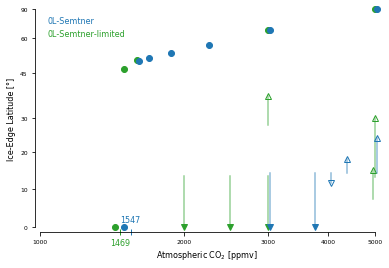

In [12]:
### %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

save_plot = True
plot_unlim = True
plot_5m = True

offset=0.01
labelsize=8
ticksize=6


fig, ax = plt.subplots(figsize=(6,4))
ax.spines['left'].set_position(('outward',5))
ax.spines['bottom'].set_position(('outward',5))
 
# 5m simulations

if plot_5m:
    color_5m='C2'
    #b=plot_simulation_merged(ax,1250, 90, 0, color_5m, 1)
    #plot_simulation_merged(ax,1375, 90, 0, color_5m, 1)
    plot_simulation_merged(ax,1438, 90, 0, color_5m, 1)
    plot_simulation_merged(ax,1500, 90, 46.6, color_5m, 1)
    plot_simulation_merged(ax,1594, 90, 50.3, color_5m, 1)
    #plot_simulation_merged(ax,1250, 90, 0, color_5m, 1)
    plot_simulation_merged(ax,3000, 90, 65, color_5m, 1)
    plot_simulation_merged(ax,5000, 90, 90, color_5m, 1)
    
    # Jormungand
    #mlo_aqua_2000ppmv_Jor2
    plot_simulation_merged(ax,2000, 13.48, 0, color_5m, 3)
    #mlo_aqua_2000ppmv_Jor5
    #plot_simulation_merged(ax,2000, 32.68, 29.34, color_5m, 3)
    #mlo_aqua_2500ppmv_Jor2
    plot_simulation_merged(ax,2500, 13.48, 0, color_5m, 3)
    #mlo_aqua_2500ppmv_Jor5
    #plot_simulation_merged(ax,2500, 32.68, 36.16, color_5m, 4)
    #mlo_aqua_3000ppmv_Jor
    plot_simulation_merged(ax,3000, 28.03, 36.87, color_5m, 4)
    #mlo_aqua_3000ppmv_Jor2
    plot_simulation_merged(ax,3000, 13.48, 0, color_5m, 3)
    #mlo_aqua_3000ppmv_Jor3
    #plot_simulation_merged(ax,3000, 16.26, 22.95, color_5m, 4)
    #mlo_aqua_5000ppmv_Jor
    #plot_simulation_merged(ax,5000, 28.03, 34.75, color_5m, 4)
    #mlo_aqua_5000ppmv_Jor2
    plot_simulation_merged(ax,5000, 13.29, 30.00, color_5m, 4)
    #mlo_aqua_5000ppmv_Jor4
    plot_simulation_merged(ax,5000, 7.47, 15.07, color_5m, 4, -offset)
    #mlo_aqua_10000ppmv_Jor
    #plot_simulation_merged(ax,10000, 28.03, 41.30, color_5m, 4)
    
    
#hice_unlim simulations
if plot_unlim:
    color_unlim='C0'
    a=plot_simulation_merged(ax,1500, 90, 0, color_unlim, 1)
    plot_simulation_merged(ax,1594, 90, 49.54, color_unlim, 1, offset)
    plot_simulation_merged(ax,1688, 90, 51.07, color_unlim, 1)
    plot_simulation_merged(ax,1875, 90, 53.20, color_unlim, 1)
    plot_simulation_merged(ax,2250, 90, 56.85, color_unlim, 1)
    plot_simulation_merged(ax,3000, 90, 65, color_unlim, 1, offset) #5m limited, but always under 5m
    plot_simulation_merged(ax,3000, 14.46, 0, color_unlim, 3, offset)
    #plot_simulation_merged(ax,3000, 22.05, 22.83, color_unlim, 4)
    plot_simulation_merged(ax,3750, 14.46, 0, color_unlim, 3)    
    #plot_simulation_merged(ax,3750, 19.2, 18.7, color_unlim, 4)
    #plot_simulation_merged(ax,3907, 14.46, 15.1, color_unlim, 2)
    plot_simulation_merged(ax,4063, 14.46, 11.5, color_unlim, 3)
    #plot_simulation_merged(ax,4219, 14.46, 16.23, color_unlim, 2)
    plot_simulation_merged(ax,4375, 14.46, 18.2, color_unlim, 4)
    plot_simulation_merged(ax,5000, 14.46, 24, color_unlim, 4, offset)
    #plot_simulation_merged(ax,5000, 11.6, 14.3, color_unlim, 2)
    plot_simulation_merged(ax,5000, 90, 90, color_unlim, 1, offset) # limited, but no ice at all
    #plot_simulation_merged(ax,10000, 14.46, 18, color_unlim, 4)   


ax.set_yticks([np.sin(np.radians(0)),np.sin(np.radians(10)),np.sin(np.radians(20)),np.sin(np.radians(30)),np.sin(np.radians(45)),np.sin(np.radians(60)),np.sin(np.radians(90))])
ax.set_ylim(-0.1,1.1)
ax.set_xlabel("Atmospheric CO$_2$ [ppmv]",size=labelsize)
ax.set_ylabel("Ice-Edge Latitude [°]",size=labelsize)

plt.tick_params(axis='both', which='major', labelsize=ticksize)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()


ax.set_xscale('log')

ax.set_xticks(np.linspace(1000,10000,10) )
ax.set_xticklabels([1000, 2000,3000,4000,5000,'','','','',10000] )
ax.set_xlim(1000,5000)
ax.set_ylim(0,1)
# extra ticks at bifurcation points
#semtner_bif=1641
#semtner_5m_bif=1547
semtner_bif=1547
semtner_5m_bif=1469
ax.vlines([semtner_5m_bif],-0.04,-0.01,color=color_5m,lw=1,clip_on=False)
ax.vlines([semtner_bif],-0.04,-0.01,color=color_unlim,lw=1,clip_on=False)
#ax.axvline(semtner_bif,-20,0.1)
ax.annotate(semtner_bif,(semtner_bif,0.02),color=color_unlim,ha='center',clip_on=False, fontsize=labelsize)
ax.annotate(semtner_5m_bif,(semtner_5m_bif,0.1),xytext=(semtner_5m_bif,-0.05),color=color_5m,ha='center',va='top',clip_on=False, fontsize=labelsize)
ax.set_yticklabels([0,10,20,30,45,60,90])
legend_color(ax,["0L-Semtner","0L-Semtner-limited"],2, labelsize)


if save_plot:
    plt.savefig("plots/bifurcation_5mlim_merged_rev1.pdf")